#### Again try plot the density of the Drill for $\Lambda = 3.5$.

In [1]:
using IntervalArithmetic

In [2]:
Λ = Interval(3.5)
α = Λ/(Λ-1)

[1.39999, 1.40001]

In [3]:
K = Int64(floor(mid(Λ)))

3

In [4]:
q_K_k(k) = max(0, 0.5*((Λ-1-k)/(Λ-1)))
F(k) = x -> x + α*(k-(k^2-(k/α)*(k+1-2*x))^(0.5))

F (generic function with 1 method)

In [5]:
[q_K_k(i) for i in 1:K]

3-element Vector{Interval{Float64}}:
     [0.299999, 0.300001]
     [0.0999999, 0.100001]
 [0, 0]

In [6]:
using Plots

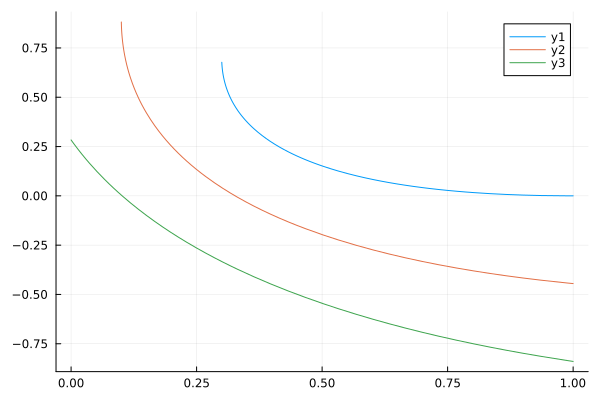

In [7]:
f1=F(1)
f2=F(2)
f3=F(3)
plot(x->mid(f1(x)-1,1), 0., 1)
plot!(x->mid(f2(x)-2,1), 0., 1)
plot!(x->mid(f3(x)-3,1), 0, 1)

In [8]:
using RigorousInvariantMeasures

In [9]:
D = PwMap([x->f3(x)-3.0;x->f2(x)-2.0; x->f1(x)-1.0], [Interval(0), Interval(0.100001), Interval(0.300001), Interval(1)])

Piecewise-defined dynamic with 3 branches

In [10]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [11]:
alpha = PwMap([x->0.897635*x], [Interval(0), Interval(1)])

Piecewise-defined dynamic with 1 branches

In [12]:
beta = PwMap([x->(x/0.897635)], [Interval(0), Interval(0.897635)])

Piecewise-defined dynamic with 1 branches

In [13]:
D1 = beta ∘ D ∘ alpha

RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches)

In [14]:
D2 = D1 ∘ D1

RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches), RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches)), Piecewise-defined dynamic with 9 branches)

In [15]:
Q = DiscretizedOperator(B, D2)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/YDNtu/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:05


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([80, 81, 82, 83, 84, 85, 86, 86, 87, 88  …  305, 306, 306, 306, 306, 307, 307, 307, 307, 308], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2  …  1018, 1018, 1019, 1020, 1021, 1021, 1022, 1023, 1024, 1024], Interval{Float64}[[0.0554832, 0.0554833], [0.158226, 0.158227], [0.15803, 0.158031], [0.157834, 0.157835], [0.157638, 0.157639], [0.157442, 0.157443], [0.155344, 0.155345], [0.00190129, 0.0019013], [0.15705, 0.157051], [0.156854, 0.156855]  …  [0.00295097, 0.00295098], [0.997049, 0.99705], [1, 1], [1, 1], [0.320238, 0.320239], [0.679761, 0.679762], [1, 1], [1, 1], [0.738862, 0.738863], [0.261137, 0.261138]], 1024, 1024))

In [16]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 6240 stored entries:
⠀⠀⠸⡄⢸⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⡄⠀⠀⡇⠈⡇⠀⠀⢧⠀⠀⠀⢳⢧⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢧⠀⠀⢹⠀⢹⠀⠀⢸⡀⠀⠀⠘⣾⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⢸⠀⠀⢸⡀⠈⡇⠀⠀⡇⠀⠀⠀⠋⡇⠀⠀⠀⢹⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀
⠘⡆⠀⠀⡇⠀⢳⠀⠀⢳⠀⠀⠀⠀⢹⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠲⣄⡀⠀⠀⠀⠀
⠀⡇⠀⠀⢧⠀⢸⡀⠀⢸⡀⠀⠀⠀⠘⡆⠀⠀⠀⠘⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠳⠤⣄⣀
⠀⢳⠀⠀⠈⠀⠀⡇⠀⠀⡇⠀⠀⠀⠀⢧⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⢸⠀⠀⠀⠀⠀⢧⠀⠀⢧⠀⠀⠀⠀⢸⠀⠀⠀⠀⠈⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢸⡀⠀⠀⠀⠀⢸⠀⠀⢸⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⢸⡀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡇⠀⠀⠀⠀⠘⡆⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⡇⠀⠀⠀⠀⠀⡇⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢧⠀⠀⠀⠀⠀⡇⠀⠀⣇⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⢸⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⢳⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠃⠀⠀⢸⠀⠀⠀⠀⠀⠃⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [17]:
norms = powernormbounds(B, D2; Q=Q)

32-element Vector{Float64}:
 1.0000000004227587
 1.0000000008455177
 1.0000000012682766
 1.0000000016910355
 0.773317190519573
 0.13881952674276302
 0.02393486987274728
 0.004678518865401771
 0.0046785188673796555
 0.00467851886935754
 0.004678518871335425
 0.00467851887331331
 0.0033226273083843943
 ⋮
 1.3711760283039907e-5
 2.680220511042436e-6
 5.23899327258365e-7
 1.0240594158986414e-7
 1.0240594163315715e-7
 1.0240594167645014e-7
 1.0240594171974315e-7
 1.0240594176303615e-7
 6.415072916206893e-8
 1.253946222434881e-8
 2.451072886149557e-9
 4.791081296574112e-10

In [18]:
w = invariant_vector(B, Q)

1024-element Vector{Float64}:
 3.8061593473358964e-16
 3.8061593473358964e-16
 3.8061593473358964e-16
 3.8061593473358964e-16
 0.7297273199135536
 1.2847582391523642
 1.3610503799019538
 1.4205066689305592
 1.4687205327828716
 1.5083612954083947
 1.5401772649445573
 1.5663905179870208
 1.5903907221967992
 ⋮
 0.011710421762394459
 0.010880634925770011
 0.010051598530089025
 0.009223314057683046
 0.008395782987840376
 0.007569006785613781
 0.00674298692470322
 0.005917724861559434
 0.005093222053908762
 0.004269479950438874
 0.003446499996026576
 0.002623192938138748

In [19]:
strong_norm(B)

TotalVariation

In [20]:
aux_norm(B)

L1

In [21]:
using Plots, LaTeXStrings

In [22]:
dfly_coefficients = dfly(strong_norm(B), aux_norm(B), D2)

LoadError: InterruptException:

In [25]:
D3 = D1 ∘ D2

RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches), RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches), RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches))

In [26]:
D4 = D1 ∘ D3

RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches), RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), Piecewise-defined dynamic with 3 branches), RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((RigorousInvariantMeasures.ComposedDynamic((Piecewise-defined dynamic with 1 branches, Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 3 branches), Piecewise-defined dynamic with 1 branches), 

In [27]:
Q = DiscretizedOperator(B, D4)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/YDNtu/src/GenericAssembler.jl:102
Computing preimages... 100%|█████████████████████████████| Time: 0:00:01
Computing preimages... 100%|█████████████████████████████| Time: 0:00:04


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([71, 72, 73, 74, 75, 76, 77, 78, 79, 80  …  11, 11, 12, 12, 13, 13, 14, 14, 15, 16], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1020, 1021, 1021, 1022, 1022, 1023, 1023, 1024, 1024, 1024], Interval{Float64}[[0.0236542, 0.0236543], [0.0255524, 0.0255525], [0.0255256, 0.0255257], [0.0254989, 0.025499], [0.0254721, 0.0254722], [0.0254453, 0.0254454], [0.0254186, 0.0254187], [0.0253919, 0.025392], [0.0253651, 0.0253652], [0.0253384, 0.0253385]  …  [0.11405, 0.114051], [0.67606, 0.676061], [0.323939, 0.32394], [0.471419, 0.47142], [0.52858, 0.528581], [0.272136, 0.272137], [0.727863, 0.727864], [0.0783224, 0.0783225], [0.811771, 0.811772], [0.109905, 0.109906]], 1024, 1024))

In [28]:
Q.L

1024×1024 SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64} with 32098 stored entries:
⡇⡇⢸⣿⠘⣿⠀⡇⣿⠀⡇⢳⢸⣿⠀⡇⠘⡿⡄⠀⡇⠀⠀⠸⡄⠀⠀⣇⠸⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙
⣿⣿⢸⣿⡇⣿⡇⣿⣿⣇⣿⢸⢸⣿⢳⣿⡇⣿⡇⡇⢻⠸⡄⠀⡇⠀⠀⢸⠀⣇⠀⠀⠸⡄⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⢹⣿⣿⣼⣿⢸⣾⣿⢸⣿⡇⣿⡇⡇⢸⠀⡇⠀⢳⢧⠀⠸⡄⢸⡀⠀⠀⢧⠀⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⣿⣸⣿⢻⣿⣿⢸⣿⣿⣾⢸⡇⢻⣇⣇⠘⡆⡇⠀⢸⣸⠀⠀⡇⠀⡇⠀⠀⠸⡄⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⢹⣿⣿⢸⣿⣿⢸⣿⣿⣿⢸⡇⢸⢸⢸⠀⡇⢧⠀⠀⣿⠀⠀⢧⠀⢹⠀⠀⠀⢧⠀⠀⠀⠀⠀
⣿⣿⣿⣿⣿⢸⣿⣿⢸⣿⡏⣿⣿⢻⣿⢸⢹⢸⢸⢸⠀⡇⢸⠀⠀⡏⡇⠀⢸⠀⠘⡆⠀⠀⠸⡄⠀⠀⠀⠀
⢹⣿⡏⣿⣿⠈⣿⢻⡈⣿⢳⡏⡏⠈⣿⢸⢸⠈⢸⢸⠀⡇⢸⠀⠀⠁⡇⠀⠈⠀⠀⣇⠀⠀⠀⢧⠀⠀⠀⠀
⢸⣿⡇⣿⣿⠀⣿⢸⡇⣿⢸⡇⡇⠀⣿⢸⢸⠀⢸⢸⠀⢧⠸⡄⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠸⡄⠀⠀⠀
⢸⣿⡇⡏⣿⠀⣿⢸⡇⣿⢸⡇⡇⠀⣿⠘⣾⠀⢸⢸⠀⢸⠀⡇⠀⠀⢹⠀⠀⠀⠀⠸⡄⠀⠀⠀⣇⠀⠀⠀
⢸⣿⡇⡇⣿⠀⣿⢸⡇⣿⢸⡇⡇⡆⡏⡇⣿⡆⠘⡾⡄⢸⠀⡇⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⢸⡀⠀⠀
⢸⣿⡇⡇⣟⡆⣿⢸⡇⣿⢸⡇⡇⡇⡇⡇⣿⡇⠀⡇⡇⢸⠀⡇⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⡇⠀⠀
⢸⣿⡇⡇⣿⡇⣿⢸⡇⣿⢸⡇⡇⡇⡇⡇⣿⡇⠀⡇⡇⢸⠀⣇⠀⠀⢸⠀⠀⠀⠀⠀⢧⠀⠀⠀⠀⢹⠀⠀
⢸⣿⡇⡇⣿⡇⣿⢸⡇⣿⢸⡇⡇⡇⡇⡇⣿⡇⠀⡇⡇⢸⠀⢸⠀⠀⠘⡆⠀⠀⠀⠀⢸⠀⠀⠀⠀⠸⡄⠀
⢸⣿⡇⡇⣿⡇⣿⢸⡇⣿⢸⡇⣇⡇⡇⡇⣿⡇⠀⡇⡇⢸⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀
⢸⣿⡇⡇⣿⡇⡟⣾⡇⣿⢸⡇⢸⡇⡇⡇⣿⡇⠀⡇⡇⢸⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⢸⠀⠀⠀⠀⠀⢹⠀
⠘⡟⡇⡇⢻⡇⠃⡟⡇⠛⡞⡇⢸⡇⠃⡇⢻⡇⠀⠃⡇⠘⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⠘⠀⠀⠀⠀⠀⢸⡀
⠀⡇⣇⡇⢸⡇⠀⡇⡇⠀⡇⡇⢸⡇⠀⡇⢸⡇⠀⠀⡇⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠀⡇⢸⡇⢸⡇⠀⡇⡇⠀⡇⡇⢸⡇⠀⡇⢸⡇⠀⠀⡇⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠀⡇⢸⡇⢸⡇⠀⡇⡇⠀⡇⡇⢸⡇⠀⡇⢸⡇⠀⠀⡇⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇
⠀⡇⢸⡇⢸⡇⠀⡇⡇⠀⡇⡇⢸⡇⠀⡇⢸⡇⠀⠀⡇⠀⠀⢸⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇

In [29]:
norms = powernormbounds(B, D4; Q=Q)

16-element Vector{Float64}:
 1.000000002045681
 1.0000000040913621
 0.35791879053868714
 0.018944260815247322
 0.0007098033880026455
 3.799502557148813e-5
 2.2361586878643938e-6
 1.3083812945468587e-7
 1.3083812972233897e-7
 1.3083812998999206e-7
 2.6968997877889425e-8
 1.4436219681780368e-9
 8.496290652731299e-11
 4.971198074356464e-12
 2.9257481988402205e-13
 1.711861611920114e-14

In [30]:
w = invariant_vector(B, Q)

1024-element Vector{Float64}:
 1.300583174757839e-16
 1.300583174757839e-16
 1.300583174757839e-16
 1.300583174757839e-16
 0.7298875355954482
 1.284291952511983
 1.3615036438728403
 1.4212507533361154
 1.468948263797783
 1.5077216033424006
 1.539767068116382
 1.566849912591289
 1.5901291191240072
 ⋮
 0.011717110922566469
 0.010886754008298706
 0.01005716911945318
 0.009228356106945623
 0.008400314823097232
 0.007573045100710878
 0.006746546797142994
 0.005920819754223758
 0.005095863811809666
 0.004271678820990956
 0.0034482646154751946
 0.0026245297949945567

In [31]:
strong_norm(B)

TotalVariation

In [32]:
aux_norm(B)

L1

In [33]:
dfly_coefficients = dfly(strong_norm(B), aux_norm(B), D4)

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer